# Seminar 0 (Linear models, Optimization)

In this seminar you will implement a simple linear classifier using numpy and your brain.

In [5]:
!pip3 install scikit-learn --user

    100% |████████████████████████████████| 11.9MB 102kB/s eta 0:00:01
You are using pip version 8.1.1, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


## Two-dimensional classification

/appl/opt/python/3.4.5-gcc493-shared/lib/python3.4/site-packages/matplotlib-1.4.3-py3.4-linux-x86_64.egg/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


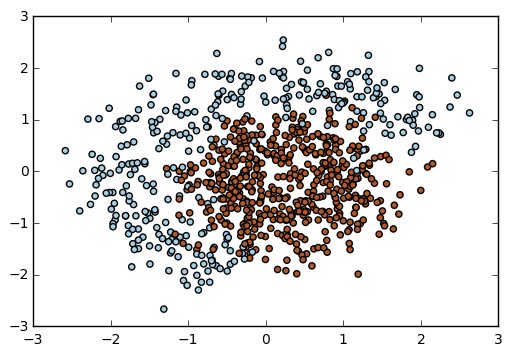

In [167]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
from IPython import display
from sklearn import datasets, preprocessing

(X, y) = datasets.make_circles(n_samples=1024, shuffle=True, noise=0.2, factor=0.4)
ind = np.logical_or(y==1, X[:,1] > X[:,0] - 0.5)
X = X[ind,:]
m = np.array([[1, 1], [-2, 1]])
X = preprocessing.scale(X)
y = y[ind]
y = 2*y - 1
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.show()

In [171]:
h = 0.01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
def visualize(X, y, w, loss, n_iter):
    plt.clf()
    Z = classify(np.c_[xx.ravel(), yy.ravel()], w)
    Z = Z.reshape(xx.shape)
    plt.subplot(1,2,1)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.subplot(1,2,2)
    plt.plot(loss)
    ymin, ymax = plt.ylim()
    plt.ylim(0, ymax)
    display.clear_output(wait=True)
    display.display(plt.gcf())

**Your task starts here**

First, let's write function that predicts class given X.

Since the problem above isn't linearly separable, we add quadratic features to the classifier. This transformation is implemented in the __expand__ function.

__don't forget to expand X inside classify and other functions__

Classifying sample should not be much harder that computing sign of dot product.

In [172]:
def expand(X):
    X_ = np.zeros((X.shape[0], 6))
    X_[:,0:2] = X
    X_[:,2:4] = X**2
    X_[:,4] = X[:,0] * X[:,1]
    X_[:,5] = 1
    return X_

def classify(X, w):
    """
    Given feature matrix X [n_samples,2] and weight vector w [6],
    return an array of +1 or -1 predictions"""
    #<your code here>
    a=np.sign(np.dot(expand(X),w))
    # or return np.sign(expand(X.dot(w)) # teacher
    return a


In [173]:
#vector of random numbers
a=np.random.normal(size=6)
X
#w=np.zeros(6)
#w=random.uniform(-1.5,2.5)
#w=np.random.rand(6,1)-0.5

#print(w)
#classify(X, w)

array([[-1.09639252,  1.09206262],
       [ 0.76102026,  0.0977013 ],
       [-0.67335884, -0.54494376],
       ..., 
       [ 0.26668819, -0.93253482],
       [ 1.23286204, -0.56920344],
       [ 1.1329349 ,  0.25590195]])

The loss you should try to minimize is the Hinge Loss.

$$ L =  {1 \over N} \sum_i max(0,1-y_i \cdot \vec w \vec x_i) $$



In [111]:
(X*y.reshape((len(y),1)))
#margin=y*expand(X).dot(w)
#grad=margin
#grad[grad >= 1] = 0

array([[ 1.83851529,  1.10575335],
       [ 1.24467055,  2.20336373],
       [ 1.90067635, -0.07956   ],
       ..., 
       [-0.14416395, -1.35873825],
       [ 0.9696633 , -1.62575075],
       [ 0.4988008 ,  0.07344294]])

In [195]:
def compute_loss(X, y, w):
    """
    Given feature matrix X [n_samples,2], target vector [n_samples] of +1/-1,
    and weight vector w [6], compute scalar loss function using formula above.
    """
    #<your code here>
    
    np.dot(expand(X),w)
    margin=y*expand(X).dot(w)  # called margin
    L=np.maximum(0,1-margin).mean()
    return L

def compute_grad(X, y, w):
    """
    Given feature matrix X [n_samples,2], target vector [n_samples] of +1/-1,
    and weight vector w [6], compute vector [6] of derivatives of L over each weights.
    """
    print(y.shape)
    print(expand(X).shape)
    print(w.shape)
    print('m shape', (y * expand(X).dot(w)).shape)
    m = (y* expand(X).dot(w))
    
#    grad=margin
    
    grad = -y.reshape((len(y),1))* expand(X)
    print(grad.shape)
    
    grad[m > 1] = 0   
    
#    grad[grad >= 1] = 0
#    grad[grad < 1] = -1
    
    
    #<your code here>
    return grad.mean(axis=0)

In [198]:
compute_grad(X, y, w)

(830,)
(830, 6)
(6,)
m shape (830,)
(830, 6)


array([-0.00708815, -0.0727846 ,  0.09156436,  0.07877153,  0.05444284,
       -0.1313253 ])

### Training
Find an optimal learning rate for gradient descent for given batch size. 

You can see the example of correct output below this cell before you run it.

**Don't change the batch size!**

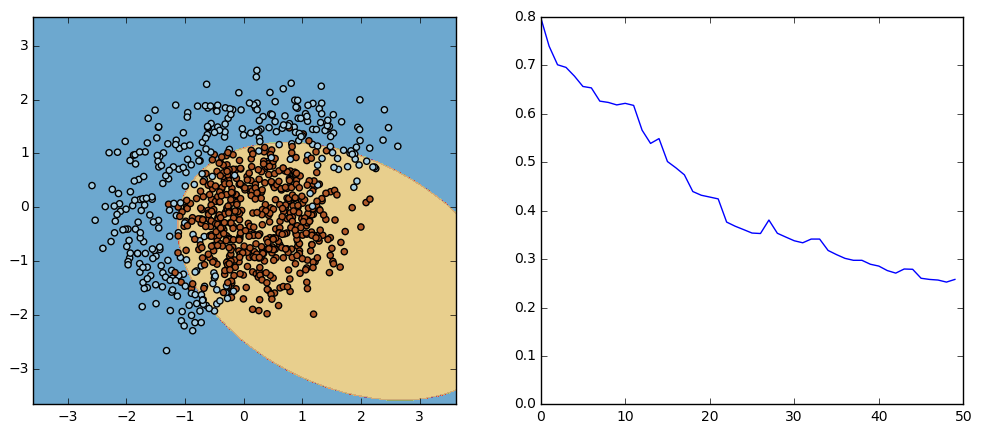

In [199]:
w = np.array([1,0,0,0,0,0])

alpha = 0.1 # learning rate

n_iter = 50
batch_size = 4
loss = np.zeros(n_iter)
plt.figure(figsize=(12,5))
for i in range(n_iter):
    ind = random.sample(range(X.shape[0]), batch_size)
    loss[i] = compute_loss(X, y, w)
    visualize(X[ind,:], y[ind], w, loss, n_iter)
    
    w = w - alpha * compute_grad(X[ind,:], y[ind], w)

visualize(X, y, w, loss, n_iter)
plt.clf()

Implement gradient descent with momentum and test it's performance for different learning rate and momentum values.

In [200]:
w = np.array([1,0,0,0,0,0])

alpha = 0.0 # learning rate
mu    = 0.0 # momentum

n_iter = 50
batch_size = 4
loss = np.zeros(n_iter)
plt.figure(figsize=(12,5))
for i in range(n_iter):
    ind = random.sample(range(X.shape[0]), batch_size)
    loss[i] = compute_loss(X, y, w)
    visualize(X[ind,:], y[ind], w, loss, n_iter)
    
    <update w and anything else here>

visualize(X, y, w, loss, n_iter)
plt.clf()

SyntaxError: invalid syntax (<ipython-input-200-c6863a870040>, line 15)

Implement RMSPROP algorithm


In [201]:
w = np.array([1,0,0,0,0,0])

alpha = 0.0 # learning rate
mean_squared_norm = 0.0 #moving average of gradient norm squared

n_iter = 50
batch_size = 4
loss = np.zeros(n_iter)
plt.figure(figsize=(12,5))
for i in range(n_iter):
    ind = random.sample(range(X.shape[0]), batch_size)
    loss[i] = compute_loss(X, y, w)
    visualize(X[ind,:], y[ind], w, loss, n_iter)
    
    <update w and anything else here>


visualize(X, y, w, loss, n_iter)
plt.clf()

SyntaxError: invalid syntax (<ipython-input-201-ece7e4d74c1b>, line 15)

Which optimization method you consider the best? Type your answer in the cell below

# Bonus quest 
try the same thing for Adagrad, Adam and anything else you find suitable